In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
data=pd.read_csv('player_data.csv')
data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [3]:
#Проверяем повторяются ли игроки, есть ли пропуски в данных и тд.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
name          4550 non-null object
year_start    4550 non-null int64
year_end      4550 non-null int64
position      4549 non-null object
height        4549 non-null object
weight        4544 non-null float64
birth_date    4519 non-null object
college       4248 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 284.5+ KB


In [6]:
#Видим, что в данных есть пропуски: колледж, дата рождения и тд. Выкинем все значения из таблицы по NA


,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
5,Shareef Abdur-Rahim,1997,2008,F,6-9,225.0,"December 11, 1976",University of California
6,Tom Abernethy,1977,1981,F,6-7,220.0,"May 6, 1954",Indiana University
7,Forest Able,1957,1957,G,6-3,180.0,"July 27, 1932",Western Kentucky University
8,John Abramovic,1947,1948,F,6-3,195.0,"February 9, 1919",Salem International University
10,Alex Acker,2006,2009,G,6-5,185.0,"January 21, 1983",Pepperdine University


In [4]:
data=data.dropna()

In [5]:
#посмотрим, из какого университета выпускники чаще всего идут в баскетбол (топ 10)
college_agreg=data.groupby('college').count().sort_values(by='name', ascending=False)[['name']].reset_index()[:10]

In [6]:
college_agreg

,college,name
0,University of Kentucky,99
1,"University of California, Los Angeles",91
2,University of North Carolina,86
3,Duke University,71
4,University of Kansas,71
5,Indiana University,60
6,University of Notre Dame,56
7,University of Louisville,55
8,University of Arizona,51
9,St. John's University,50


<BarContainer object of 10 artists>

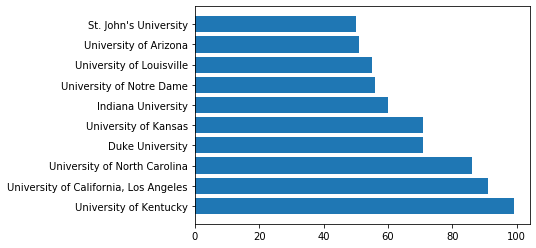

In [7]:
plt.barh(college_agreg['college'], college_agreg['name'])

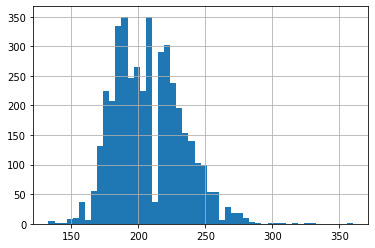

In [8]:
#Узнаем распределение по росту 
data['weight'].hist(bins = 50)

In [9]:
new_data_nba=pd.read_csv('Players.csv')

In [10]:
new_data_nba.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [30]:
new_data_nba=new_data_nba.dropna()

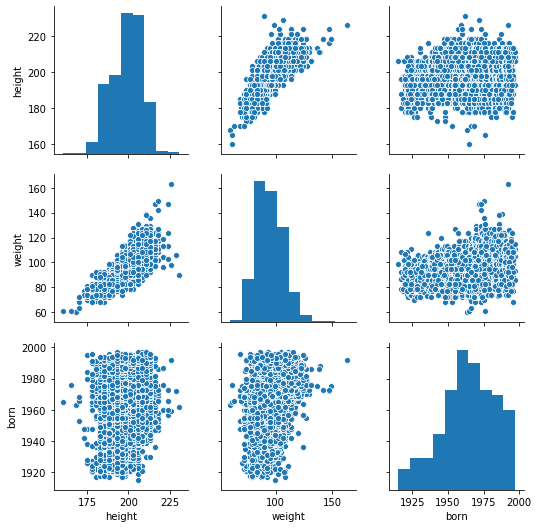

In [33]:
#просто практикуюсь в построении графиков на нахождение зависимостей между весом, ростом и датой рождения:D
sns_plot = sns.pairplot(
    new_data_nba[['height', 'weight', 'born']])
sns_plot

In [146]:
stats=pd.read_csv('Seasons_Stats.csv')

In [147]:
stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [148]:
#stats=stats.iloc[:,:7]

In [149]:
stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [169]:
stats_hm=stats[['Year','Age','G','FT%','AST','PF','PTS']].dropna()

In [170]:
stats_hm.head()

,Year,Age,G,FT%,AST,PF,PTS
0,1950.0,31.0,63.0,0.705,176.0,217.0,458.0
1,1950.0,29.0,49.0,0.708,109.0,99.0,279.0
2,1950.0,25.0,67.0,0.698,140.0,192.0,438.0
3,1950.0,24.0,15.0,0.559,20.0,29.0,63.0
4,1950.0,24.0,13.0,0.548,20.0,27.0,59.0


In [171]:
#найдем корреляция между всеми показателями
stats_corr=stats_hm.corr(method='pearson')

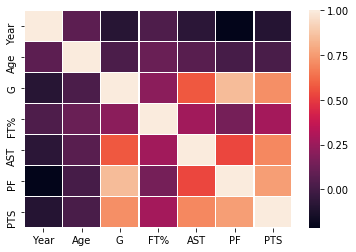

In [172]:
##построим корреляционную матрицу с помощью heatmap
sns.heatmap(stats_corr, linewidths=0.5)

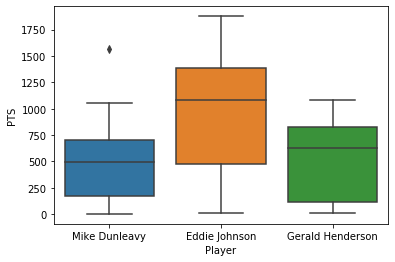

In [140]:
#Узнаем, какие PTS результаты имеют самые часто встречаемые игроки в данном дата сете

top_players = stats['Player'].value_counts().sort_values(ascending = False).head(3).index.values

sns.boxplot(x='Player', y="PTS", 
            data=(stats[stats['Player'].isin(top_players)]))